In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install pycaret
from pycaret.classification import *
#from pycaret.regression import *

# Importing the data - only use *.MLReady.csv files!!!

In [46]:
df=pd.read_csv("../../data/FM_Acq_Perf_FMAC_EPOCH3_ML.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,id,origChannel,origIntRate,origUPB,origDate,firstPmtDate,origLTV,numBorrowers,...,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct
0,1265166,1265166,100495721320,1,4.375,310000,2013-11-01,2014-01-01,64.0,1.0,...,4.16,4.255,0.045673,2.65,0.025,-0.215,0.120,0.005747,-0.051683,0.028202
1,1265167,1265167,102361386857,1,4.625,142000,2013-11-01,2014-01-01,69.0,1.0,...,4.16,4.255,0.045673,2.65,0.275,-0.465,0.370,0.063218,-0.111779,0.086957
2,1265168,1265168,102516953457,1,5.000,124000,2013-11-01,2014-01-01,80.0,1.0,...,4.16,4.255,0.045673,2.65,0.650,-0.840,0.745,0.149425,-0.201923,0.175088
3,1265169,1265169,103711862089,3,4.490,170000,2013-11-01,2014-01-01,54.0,2.0,...,4.16,4.255,0.045673,2.65,0.140,-0.330,0.235,0.032184,-0.079327,0.055229
4,1265170,1265170,104417831957,3,4.750,100000,2013-11-01,2014-01-01,32.0,1.0,...,4.16,4.255,0.045673,2.65,0.400,-0.590,0.495,0.091954,-0.141827,0.116334


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35388 entries, 0 to 35387
Data columns (total 60 columns):
Unnamed: 0                    35388 non-null int64
Unnamed: 0.1                  35388 non-null int64
id                            35388 non-null int64
origChannel                   35388 non-null int64
origIntRate                   35388 non-null float64
origUPB                       35388 non-null int64
origDate                      35388 non-null object
firstPmtDate                  35388 non-null object
origLTV                       35388 non-null float64
numBorrowers                  35388 non-null float64
origDebtIncRatio              35388 non-null float64
borrCreditScore               35388 non-null float64
loanPurp                      35388 non-null int64
zipCode                       35388 non-null int64
pMIperct                      35388 non-null float64
mortInsType                   35388 non-null float64
bestCreditScore               35388 non-null float64
worstC

## Remove columns not involved in 'Foreclosure or Not' query

In [48]:
df.drop(['Unnamed: 0','Unnamed: 0.1','id','firstPmtDate','rptPeriod','currIntRate','currUPB','loanAge','monMatur',\
         'zeroBalDate','lastPdInstDate','forecloDate','dispDate','forecloCost','propRepCost','recovCosts',\
         'miscCost','holdTaxCost','saleProceed','credEnhProceed','repurchProceed','otherForecloProceed',\
         'nonIntUPB','prinForgivBal','repurchMakeWholeProceedFlg','forecloPrinWriteOffAmnt','servActivIndicator',\
         'deliqGood','deliqBad','deliqMax'],1,inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35388 entries, 0 to 35387
Data columns (total 30 columns):
origChannel           35388 non-null int64
origIntRate           35388 non-null float64
origUPB               35388 non-null int64
origDate              35388 non-null object
origLTV               35388 non-null float64
numBorrowers          35388 non-null float64
origDebtIncRatio      35388 non-null float64
borrCreditScore       35388 non-null float64
loanPurp              35388 non-null int64
zipCode               35388 non-null int64
pMIperct              35388 non-null float64
mortInsType           35388 non-null float64
bestCreditScore       35388 non-null float64
worstCreditScore      35388 non-null float64
avgCreditScore        35388 non-null float64
bankNumber            35388 non-null int64
stateNumber           35388 non-null int64
mSA                   35388 non-null int64
zeroBalCode           35388 non-null float64
fmacRateMax           35388 non-null float64
fmacRa

## Engineer originDate into Date features

In [50]:
df['origDate'] = pd.to_datetime(df['origDate'])

In [51]:
df['origYear'] = df['origDate'].dt.year
df['origMonth'] = df['origDate'].dt.month

In [52]:
df.drop(['origDate'],1,inplace=True)

In [53]:
df[['origYear','origMonth']].head()

,origYear,origMonth
0,2013,11
1,2013,11
2,2013,11
3,2013,11
4,2013,11


# Turn zero Balance Code Into binary "0" GOOD and "1" BAD

In [54]:
df.zeroBalCode.unique()

array([ 1.,  9., 16.,  3.,  2.,  6., 15.])

In [55]:
df['zeroBalCode'] = df.zeroBalCode.replace(1,0)
df['zeroBalCode'] = df.zeroBalCode.replace([9,3,16,6,2,15],1)

In [56]:
df.zeroBalCode.unique()

array([0., 1.])

In [57]:
#Checking datatypes of individual feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35388 entries, 0 to 35387
Data columns (total 31 columns):
origChannel           35388 non-null int64
origIntRate           35388 non-null float64
origUPB               35388 non-null int64
origLTV               35388 non-null float64
numBorrowers          35388 non-null float64
origDebtIncRatio      35388 non-null float64
borrCreditScore       35388 non-null float64
loanPurp              35388 non-null int64
zipCode               35388 non-null int64
pMIperct              35388 non-null float64
mortInsType           35388 non-null float64
bestCreditScore       35388 non-null float64
worstCreditScore      35388 non-null float64
avgCreditScore        35388 non-null float64
bankNumber            35388 non-null int64
stateNumber           35388 non-null int64
mSA                   35388 non-null int64
zeroBalCode           35388 non-null float64
fmacRateMax           35388 non-null float64
fmacRateMin           35388 non-null float64
fmacR

# Review values for dates and slice (if needed) the timeframe you want

In [58]:
df.origYear.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [59]:
df['origMonth'].unique()

array([11, 12,  1,  2,  3,  5,  4,  6,  7,  9,  8, 10], dtype=int64)

# Coerce the column dtype (int in this case)

In [60]:
df = df.astype({'origLTV':'int','numBorrowers':'int','origDebtIncRatio':'int',\
               'borrCreditScore':'int','mortInsType':'int','bestCreditScore':'int',\
               'worstCreditScore':'int','avgCreditScore':'int','zeroBalCode':'object'})
#,'zeroBalCode':'int'

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35388 entries, 0 to 35387
Data columns (total 31 columns):
origChannel           35388 non-null int64
origIntRate           35388 non-null float64
origUPB               35388 non-null int64
origLTV               35388 non-null int32
numBorrowers          35388 non-null int32
origDebtIncRatio      35388 non-null int32
borrCreditScore       35388 non-null int32
loanPurp              35388 non-null int64
zipCode               35388 non-null int64
pMIperct              35388 non-null float64
mortInsType           35388 non-null int32
bestCreditScore       35388 non-null int32
worstCreditScore      35388 non-null int32
avgCreditScore        35388 non-null int32
bankNumber            35388 non-null int64
stateNumber           35388 non-null int64
mSA                   35388 non-null int64
zeroBalCode           35388 non-null object
fmacRateMax           35388 non-null float64
fmacRateMin           35388 non-null float64
fmacRateAvg           

In [62]:
#df.to_csv('D:\FM_FULL_EPOCH2_MLReady.csv')

# Review metrics last time before run (to have record of starting values)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35388 entries, 0 to 35387
Data columns (total 31 columns):
origChannel           35388 non-null int64
origIntRate           35388 non-null float64
origUPB               35388 non-null int64
origLTV               35388 non-null int32
numBorrowers          35388 non-null int32
origDebtIncRatio      35388 non-null int32
borrCreditScore       35388 non-null int32
loanPurp              35388 non-null int64
zipCode               35388 non-null int64
pMIperct              35388 non-null float64
mortInsType           35388 non-null int32
bestCreditScore       35388 non-null int32
worstCreditScore      35388 non-null int32
avgCreditScore        35388 non-null int32
bankNumber            35388 non-null int64
stateNumber           35388 non-null int64
mSA                   35388 non-null int64
zeroBalCode           35388 non-null object
fmacRateMax           35388 non-null float64
fmacRateMin           35388 non-null float64
fmacRateAvg           

In [64]:
df.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,...,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
0,1,4.375,310000,64,1,50,751,1,220,0.0,...,0.045673,2.65,0.025,-0.215,0.120,0.005747,-0.051683,0.028202,2013,11
1,1,4.625,142000,69,1,45,640,2,841,0.0,...,0.045673,2.65,0.275,-0.465,0.370,0.063218,-0.111779,0.086957,2013,11
2,1,5.000,124000,80,1,35,695,1,291,0.0,...,0.045673,2.65,0.650,-0.840,0.745,0.149425,-0.201923,0.175088,2013,11
3,3,4.490,170000,54,2,39,649,1,117,0.0,...,0.045673,2.65,0.140,-0.330,0.235,0.032184,-0.079327,0.055229,2013,11
4,3,4.750,100000,32,1,30,773,1,919,0.0,...,0.045673,2.65,0.400,-0.590,0.495,0.091954,-0.141827,0.116334,2013,11


# Pycaret - Setup with categorical definition

### Use feature engineering, polynomial features, trig feats, PCA

In [65]:
# models=setup(df, target = 'rateDiffPct',
#              feature_interaction=True, feature_ratio=True,
#              polynomial_features=True, pca=True, pca_components=10,
#             numeric_features = ['origUPB','origLTV','numBorrowers','origDebtIncRatio',\
#                                'avgCreditScore'],
#             ignore_features = ['origIntRate','rank','deal'])

### Use feature engineering, polynomial features, trig feats

In [66]:
models=setup(df, target = 'zeroBalCode', categorical_features = ['numBorrowers', 'mortInsType'],
            numeric_features = ['origLTV', 'origDebtIncRatio', 'borrCreditScore', 'bestCreditScore', 'worstCreditScore',
                               'avgCreditScore'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1732
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(35388, 31)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compare Models with blacklist exclusions

In [67]:
model_results=compare_models()
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.9451,0.7599,0,0,0,0
1,Ridge Classifier,0.9451,0,0,0,0,0
2,Extra Trees Classifier,0.9451,0.663,0,0,0,0
3,Extreme Gradient Boosting,0.9447,0.7434,0,0,0,-0.0008
4,Random Forest Classifier,0.9439,0.6325,0,0,0,-0.0023
5,CatBoost Classifier,0.9431,0.7301,0.0077,0.1,0.0143,0.0092
6,Linear Discriminant Analysis,0.9423,0.7359,0,0,0,-0.005
7,Gradient Boosting Classifier,0.941,0.729,0.0297,0.12,0.0466,0.0357
8,Light Gradient Boosting Machine,0.941,0.7011,0.0225,0.1333,0.0383,0.0275
9,K Neighbors Classifier,0.9406,0.5472,0,0,0,-0.008


## Create models - store in variable

In [68]:
cat = create_model('catboost', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9435,0.7521,0.0000,0.0,0.0000,0.0000
1,0.9395,0.7018,0.0000,0.0,0.0000,-0.0076
2,0.9395,0.7595,0.0000,0.0,0.0000,-0.0076
3,0.9435,0.6600,0.0000,0.0,0.0000,0.0000
4,0.9435,0.6609,0.0000,0.0,0.0000,0.0000
5,0.9435,0.7091,0.0000,0.0,0.0000,0.0000
6,0.9393,0.7462,0.0000,0.0,0.0000,-0.0142
7,0.9433,0.6943,0.0000,0.0,0.0000,-0.0076
8,0.9514,0.7492,0.0769,1.0,0.1429,0.1364
9,0.9433,0.8682,0.0000,0.0,0.0000,-0.0076


## Tune Models

In [69]:
tuned_cat = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9435,0.6716,0.0,0.0,0.0,0.0
1,0.9435,0.7488,0.0,0.0,0.0,0.0
2,0.9435,0.8120,0.0,0.0,0.0,0.0
3,0.9435,0.6761,0.0,0.0,0.0,0.0
4,0.9435,0.6801,0.0,0.0,0.0,0.0
5,0.9435,0.6004,0.0,0.0,0.0,0.0
6,0.9474,0.8889,0.0,0.0,0.0,0.0
7,0.9474,0.8074,0.0,0.0,0.0,0.0
8,0.9474,0.7949,0.0,0.0,0.0,0.0
9,0.9474,0.6634,0.0,0.0,0.0,0.0


## Ensemble models

In [70]:
cat_bagged = ensemble_model(cat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9435,0.7360,0.0,0.0,0.0,0.0
1,0.9435,0.7109,0.0,0.0,0.0,0.0
2,0.9435,0.7854,0.0,0.0,0.0,0.0
3,0.9435,0.7390,0.0,0.0,0.0,0.0
4,0.9435,0.6450,0.0,0.0,0.0,0.0
5,0.9435,0.6862,0.0,0.0,0.0,0.0
6,0.9474,0.7528,0.0,0.0,0.0,0.0
7,0.9474,0.7163,0.0,0.0,0.0,0.0
8,0.9474,0.7574,0.0,0.0,0.0,0.0
9,0.9474,0.8287,0.0,0.0,0.0,0.0


## Evaluate Models

In [88]:
# interpret_model(estimator=lgbm, plot='reason')

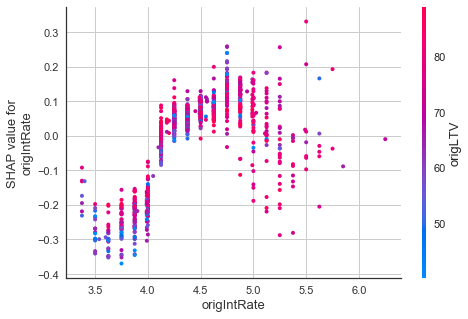

In [89]:
interpret_model(estimator = cat, plot = 'correlation')

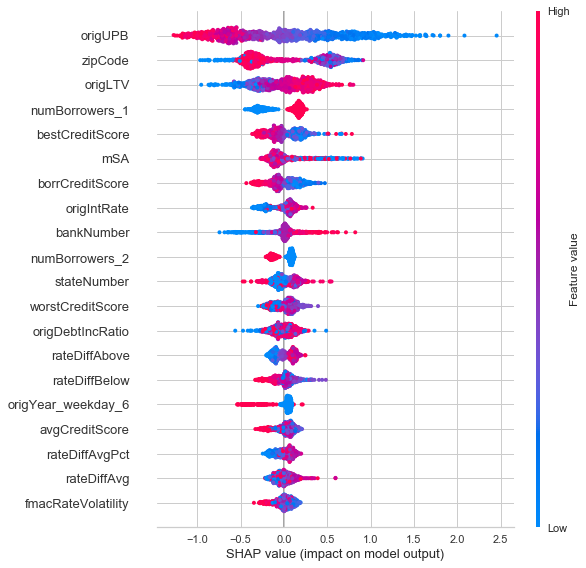

In [90]:
interpret_model(estimator = cat, plot = 'summary')